## Objective 2: Do buses bring convenience to our daily lives

In [86]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# import and read datasets
busServices = pd.read_csv('data/bus_services.csv')
busStops = pd.read_csv('data/bus_stops.csv')

## Cleaning 'bus_stops.csv' dataframe

In [87]:
# what's inside the dataframe (before cleaning)
busStops.head(5)

,Unnamed: 0,BusStopCode,RoadName,Description,Latitude,Longitude
0,0,481,Woodlands Rd,BT PANJANG TEMP BUS PK,1.383764,103.758300
1,1,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536
2,2,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225
3,3,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022
4,4,1029,Nth Bridge Rd,Cosmic Insurance Bldg,1.296673,103.854414


In [88]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
busStops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5021 non-null   int64  
 1   BusStopCode  5021 non-null   int64  
 2   RoadName     5021 non-null   object 
 3   Description  5021 non-null   object 
 4   Latitude     5021 non-null   float64
 5   Longitude    5021 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 235.5+ KB


In [89]:
# drop NA values 
busStops.dropna()

# change dtype of BusStopCode from integer to string as it is a categorical variable
busStops['BusStopCode'] = busStops['BusStopCode'].astype('U10')

# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns
busStops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5021 non-null   int64  
 1   BusStopCode  5021 non-null   object 
 2   RoadName     5021 non-null   object 
 3   Description  5021 non-null   object 
 4   Latitude     5021 non-null   float64
 5   Longitude    5021 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 235.5+ KB


In [90]:
# check columns in df (before cleaning)
print(busStops.columns, "\n")

# drop 'Unnamed' column (a built-in index that came with the dataframe)
busStops.drop('Unnamed: 0', axis=1, inplace=True)

# check columns in df (after cleaning)
print(busStops.columns, "\n")

# what's inside the ridership dataframe (after cleaning)
busStops.head(5)

Index(['Unnamed: 0', 'BusStopCode', 'RoadName', 'Description', 'Latitude',
       'Longitude'],
      dtype='object') 

Index(['BusStopCode', 'RoadName', 'Description', 'Latitude', 'Longitude'], dtype='object') 



,BusStopCode,RoadName,Description,Latitude,Longitude
0,481,Woodlands Rd,BT PANJANG TEMP BUS PK,1.383764,103.758300
1,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536
2,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225
3,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022
4,1029,Nth Bridge Rd,Cosmic Insurance Bldg,1.296673,103.854414


In [91]:
# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns
busStops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BusStopCode  5021 non-null   object 
 1   RoadName     5021 non-null   object 
 2   Description  5021 non-null   object 
 3   Latitude     5021 non-null   float64
 4   Longitude    5021 non-null   float64
dtypes: float64(2), object(3)
memory usage: 196.3+ KB


In [92]:
# check for missing values
# returns True if there are missing/null values
print(busStops.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(busStops.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(busStops.isnull().sum(), "\n")

False 

0 

BusStopCode    0
RoadName       0
Description    0
Latitude       0
Longitude      0
dtype: int64 



<AxesSubplot:>

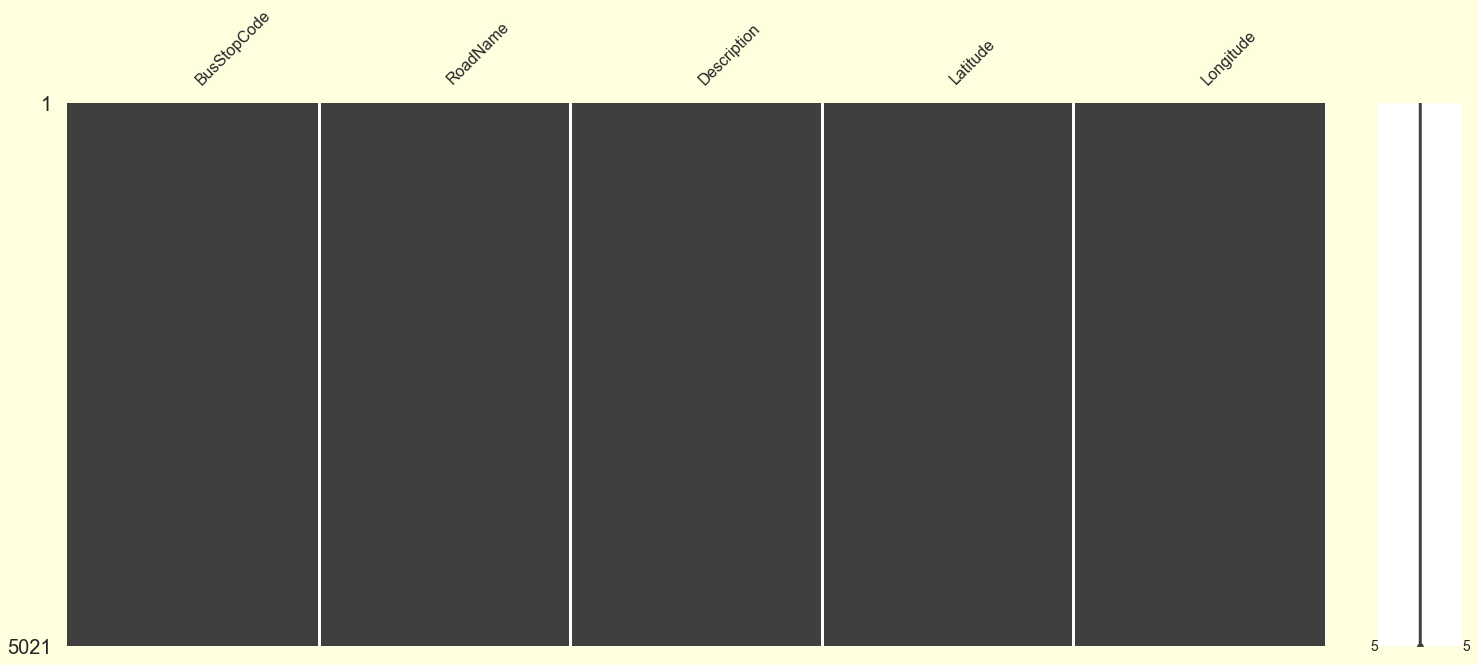

In [93]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(busStops)

## Cleaning 'bus_services.csv' dataframe

In [94]:
# 'AM_Peak_Freq' & 'PM_Peak_Freq' has been wrangled using excel

# what's inside the dataframe (before cleaning)
busServices.head(5)

,Unnamed: 0,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,0,118,GAS,1,CITY_LINK,65009.0,97009.0,7,Aug-15,11,Nov-15,NaN
1,1,118,GAS,2,CITY_LINK,97009.0,65009.0,10,10-Dec,8,Oct-15,NaN
2,2,118A,GAS,1,CITY_LINK,65199.0,96119.0,15,-,0,-,NaN
3,3,118B,GAS,1,CITY_LINK,96111.0,65191.0,0,-,30,-,NaN
4,4,119,GAS,1,CITY_LINK,65009.0,65009.0,12,18-Dec,14,15-17,Hougang St 21


In [95]:
# check information of df (before cleaning)
# - number of non-null values
# - dtype of columns
busServices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       729 non-null    int64  
 1   ServiceNo        729 non-null    object 
 2   Operator         729 non-null    object 
 3   Direction        729 non-null    int64  
 4   Category         729 non-null    object 
 5   OriginCode       727 non-null    float64
 6   DestinationCode  727 non-null    float64
 7   AM_Peak_Freq     729 non-null    int64  
 8   AM_Offpeak_Freq  729 non-null    object 
 9   PM_Peak_Freq     729 non-null    int64  
 10  PM_Offpeak_Freq  728 non-null    object 
 11  LoopDesc         263 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 68.5+ KB


In [96]:
# drop NA values
busServices.dropna()

# drop rows of 'Category' that contain "FLAT FARE"
for i in range(len(busServices.index)):
    if busServices['Category'][i] == 'FLAT FARE $2.00' or busServices['Category'][i] == 'FLAT FARE $2.70' or busServices['Category'][i] == 'FLAT FARE $3.50' or busServices['Category'][i] == 'FLAT FARE $4.00' or busServices['Category'][i] == 'FLAT FARE $4.20' or busServices['Category'][i] == 'FLAT FARE $4.50' or busServices['Category'][i] == 'FLAT FARE $5.00' or busServices['Category'][i] == 'INDUSTRIAL' or busServices['Category'][i] == 'NIGHT RIDER' or busServices['Category'][i] == 'NIGHT SERVICE' or busServices['Category'][i] == 'TOWNLINK' or busServices['Category'][i] == 'NIGHT SERVICE':
        busServices.drop([i], inplace=True)

# what's inside the busFac dataframe (after cleaning)
busServices.head(5)

,Unnamed: 0,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,0,118,GAS,1,CITY_LINK,65009.0,97009.0,7,Aug-15,11,Nov-15,NaN
1,1,118,GAS,2,CITY_LINK,97009.0,65009.0,10,10-Dec,8,Oct-15,NaN
2,2,118A,GAS,1,CITY_LINK,65199.0,96119.0,15,-,0,-,NaN
3,3,118B,GAS,1,CITY_LINK,96111.0,65191.0,0,-,30,-,NaN
4,4,119,GAS,1,CITY_LINK,65009.0,65009.0,12,18-Dec,14,15-17,Hougang St 21


In [97]:
# check columns in dataframe (before cleaning)
print(busServices.columns, "\n")

# drop all columns except 'Operator', 'Category', 'AM_Peak_Freq', 'PM_Peak_Freq' as they are unnecessary
busServices.drop(['Unnamed: 0', 'ServiceNo', 'Direction', 'OriginCode', 'DestinationCode', 'AM_Offpeak_Freq', 'PM_Offpeak_Freq', 'LoopDesc'], axis=1, inplace=True)

# check columns in dataframe (after cleaning)
print(busServices.columns)

# what's inside the busFac dataframe (after cleaning)
busServices.head(5)

Index(['Unnamed: 0', 'ServiceNo', 'Operator', 'Direction', 'Category',
       'OriginCode', 'DestinationCode', 'AM_Peak_Freq', 'AM_Offpeak_Freq',
       'PM_Peak_Freq', 'PM_Offpeak_Freq', 'LoopDesc'],
      dtype='object') 

Index(['Operator', 'Category', 'AM_Peak_Freq', 'PM_Peak_Freq'], dtype='object')


,Operator,Category,AM_Peak_Freq,PM_Peak_Freq
0,GAS,CITY_LINK,7,11
1,GAS,CITY_LINK,10,8
2,GAS,CITY_LINK,15,0
3,GAS,CITY_LINK,0,30
4,GAS,CITY_LINK,12,14


In [98]:
# check information of df (after cleaning)
# - number of non-null values
# - dtype of columns
busServices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 728
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Operator      673 non-null    object
 1   Category      673 non-null    object
 2   AM_Peak_Freq  673 non-null    int64 
 3   PM_Peak_Freq  673 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 42.5+ KB


In [99]:
# numerical summary of busFac
busServices.describe().round()

,AM_Peak_Freq,PM_Peak_Freq
count,673.0,673.0
mean,9.0,9.0
std,7.0,7.0
min,0.0,0.0
25%,5.0,4.0
50%,9.0,9.0
75%,13.0,12.0
max,38.0,38.0


In [100]:
# check for missing values
# returns True if there are missing/null values
print(busServices.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(busServices.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(busServices.isnull().sum(), "\n")

False 

0 

Operator        0
Category        0
AM_Peak_Freq    0
PM_Peak_Freq    0
dtype: int64 



<AxesSubplot:>

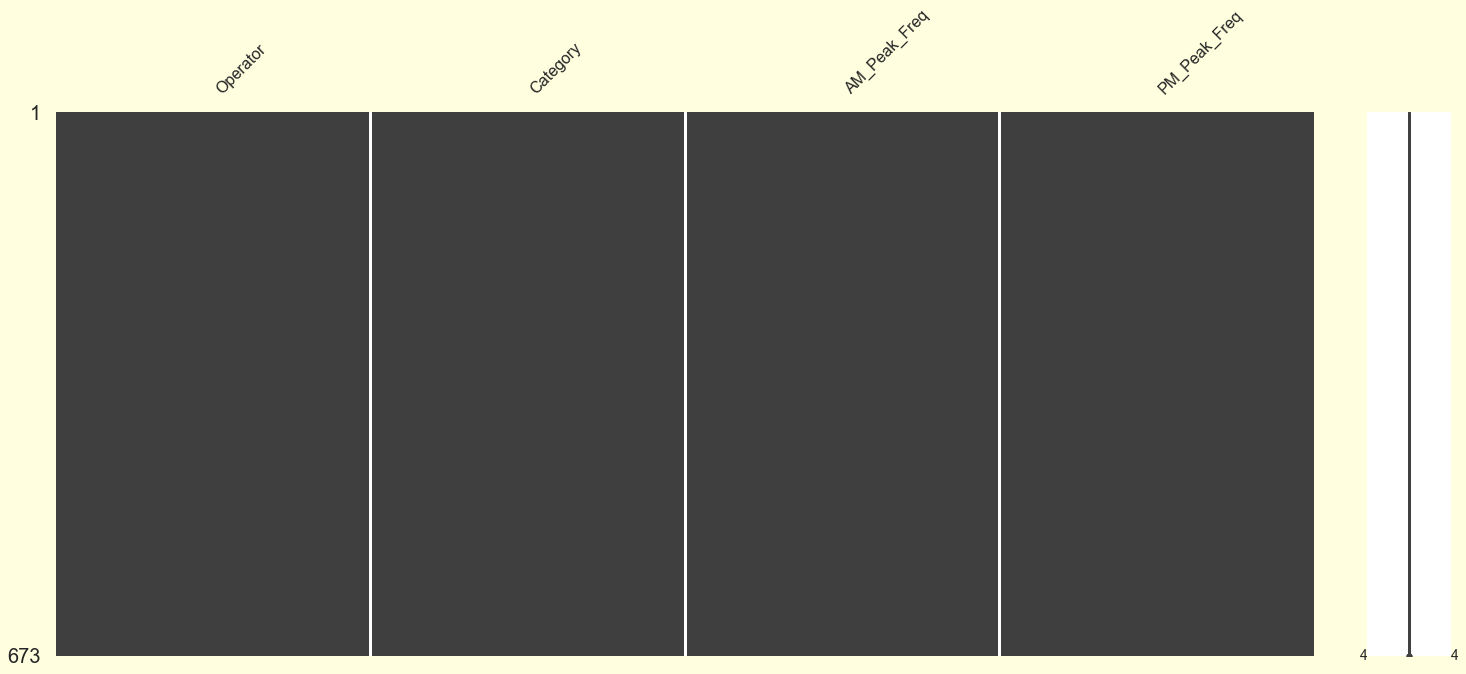

In [101]:
# visualisation of missing values in df 
import missingno as msno
msno.matrix(busServices)

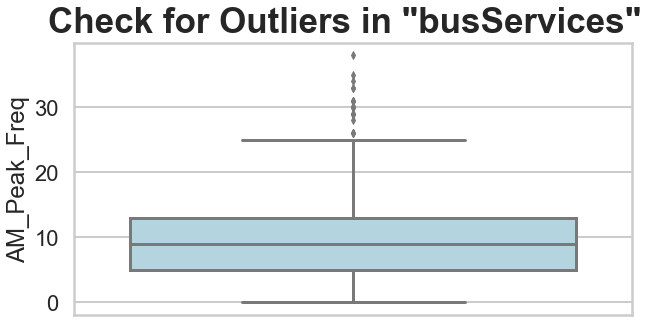

In [102]:
# -- identify outliers by plotting box plots -- 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers
# create figure & axis
fig, ax = plt.subplots(figsize=(10,5))
# set title for overall figure
fig.suptitle('Check for Outliers in "busServices"', weight="bold", fontsize=35)

# plot boxplots
sns.boxplot(y=busServices['AM_Peak_Freq'], color='lightblue')
# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

## Useful Insights 1 
- What is the distribution of bus stops in Singapore?

In [103]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# plot scatter mapbox 
fig = px.scatter_mapbox(busStops, lat="Latitude", lon="Longitude", 
                        hover_name="RoadName", hover_data=["BusStopCode", "Description"],
                        color_discrete_sequence=["purple"], zoom=9.7, height=300, title="Distribution of Bus Stops in Singapore")

# mapbox style, margin of layout 
fig.update_layout(mapbox_style="open-street-map", margin={"r":0,"t":45,"l":0,"b":0})

# show the map
fig.show()

## Useful Insights 2 
- What is the Bus Frequency like in the morning peak hour by bus operator? 

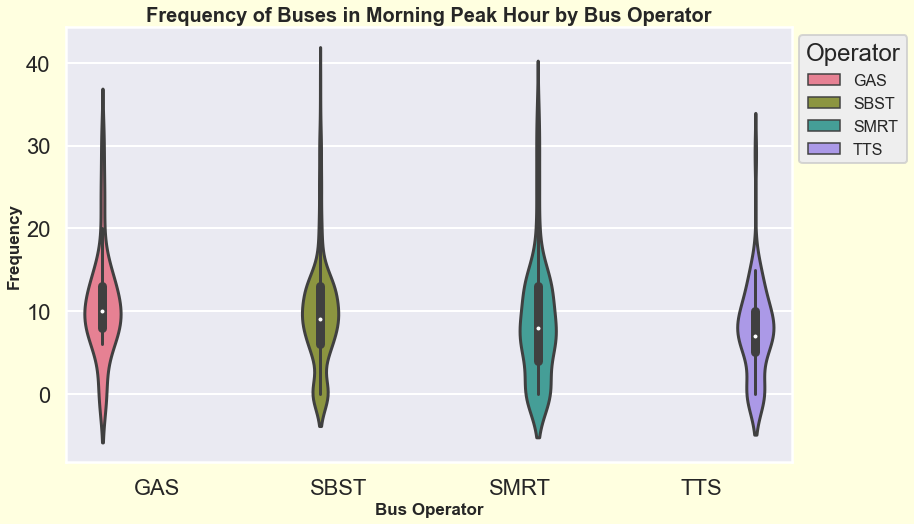

In [104]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(13,8), 'figure.facecolor':'lightyellow'})
# set context
sns.set_context("poster")

# create a figure & axis
fig, ax = plt.subplots()

# set color of violin plots 
with sns.color_palette("husl", 4):
    # plot violin plot 
    ax = sns.violinplot(data=busServices, x="Operator", y="AM_Peak_Freq", hue="Operator", scale="count")

# set graph title & labels
ax.set_title("Frequency of Buses in Morning Peak Hour by Bus Operator", fontsize=20, weight="bold")
ax.set_xlabel("Bus Operator", fontsize=17, weight="bold")
ax.set_ylabel("Frequency", fontsize=17, weight="bold")    

# change the legends location & set fontsize
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.17,1), fontsize=16)

## Useful Insights 3 
- What is the Bus Frequency like in the evening peak hour by bus category? 

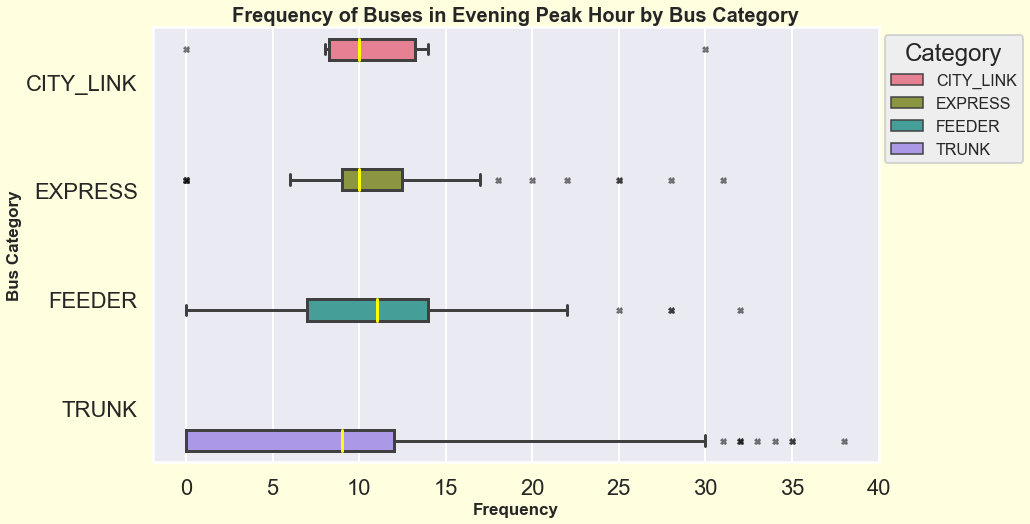

In [105]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(13,8), 'figure.facecolor':'lightyellow'})
# set context
sns.set_context("poster")

# create a figure & axis
fig, ax = plt.subplots()

# set color of box plots
with sns.color_palette("husl", 4):
    # plot boxplot
    ax = sns.boxplot(data=busServices, x="PM_Peak_Freq", y="Category", hue="Category", medianprops={"color": "yellow"}, flierprops=dict(marker='X', markersize=6, markerfacecolor='black', alpha=0.5))

# set title & axis labels
ax.set_title("Frequency of Buses in Evening Peak Hour by Bus Category", weight="bold", fontsize=20)
ax.set_xlabel("Frequency", weight="bold", fontsize=17)
ax.set_xticks([0,5,10,15,20,25,30,35,40])
ax.set_ylabel("Bus Category", weight="bold", fontsize=17)

# change the legends location & set fontsize
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.21,1), fontsize=16)